100.0%┣██████████████████████████████████████████┫ 1/1 [00:00<Inf:Inf, 0.0 it/s]
┌ Warning: `DataFrame(columns::AbstractMatrix)` is deprecated, use `DataFrame(columns, :auto)` instead.
│   caller = #generate#1(::Int64, ::Function, ::Main.Ntl.Models.Mixture{Main.Ntl.Models.NtlParameters{Main.Ntl.Models.GeometricArrivals},Main.Ntl.Models.MultinomialParameters}) at synthetic.jl:147
└ @ Main.Ntl.Generate /Users/seanla/Projects/ntl-stick-breaking-julia/src/synthetic.jl:147
┌ Warning: `DataFrame(columns::AbstractMatrix)` is deprecated, use `DataFrame(columns, :auto)` instead.
│   caller = #generate#1(::Int64, ::Function, ::Main.Ntl.Models.Mixture{Main.Ntl.Models.NtlParameters{Main.Ntl.Models.GeometricArrivals},Main.Ntl.Models.MultinomialParameters}) at synthetic.jl:149
└ @ Main.Ntl.Generate /Users/seanla/Projects/ntl-stick-breaking-julia/src/synthetic.jl:149


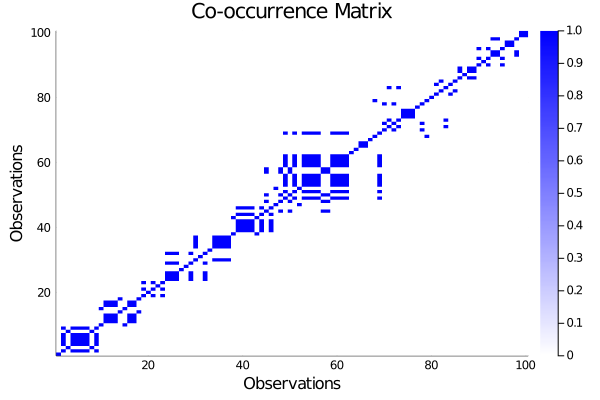

In [5]:
include("../ntl.jl")
import Random

using LinearAlgebra
Random.seed!(1)
dirichlet_scale = ones(Float64, 10)
data_parameters = Ntl.Models.MultinomialParameters(15, dirichlet_scale)

psi_prior = Vector{Float64}([1, 1])
phi_prior = Vector{Float64}([1, 1])
geometric_arrival = Ntl.Models.GeometricArrivals(phi_prior)
ntl_cluster_parameters = Ntl.Models.NtlParameters(psi_prior, geometric_arrival)

mixture_model = Ntl.Models.Mixture(ntl_cluster_parameters, data_parameters)

mixture = Ntl.Generate.generate(mixture_model, n=100)
data = Matrix(transpose(mixture[:, 2:end]))
true_clustering = mixture[:, 1]
Ntl.Plot.plot_assignments(true_clustering)
Ntl.Plot.plot_co_occurrence_matrix(true_clustering)

100.0%┣███████████████████████████████████████┫ 999/999 [00:19<00:00, 53.2 it/s]
100.0%┣███████████████████████████████████┫ 1000/1000 [00:00<00:00, 2103.3 it/s]


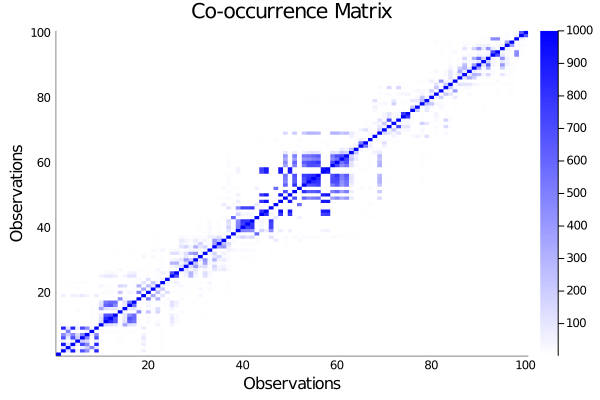

In [6]:
gibbs_sampler = Ntl.Samplers.GibbsSampler(1000)
gibbs_results = Ntl.Fitter.fit(data, mixture_model, gibbs_sampler)
Ntl.Plot.plot_co_occurrence_matrix(Matrix(gibbs_results))

100.0%┣██████████████████████████████████████████┫ 99/99 [00:52<00:00, 1.9 it/s]
100.0%┣█████████████████████████████████┫ 10000/10000 [00:05<00:00, 2094.9 it/s]


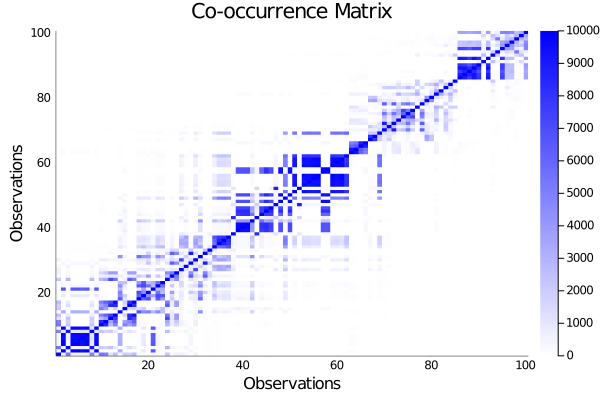

In [3]:
smc = Ntl.Samplers.SequentialMonteCarlo(10000, 0.5)
mixture_model = Ntl.Models.Mixture(ntl_cluster_parameters, data_parameters)
smc_results = Ntl.Fitter.fit(data, mixture_model, smc)
Ntl.Plot.plot_co_occurrence_matrix(Matrix(smc_results))

100.0%┣████████████████████████████████████┫ 9999/9999 [00:22<00:00, 459.2 it/s]
100.0%┣█████████████████████████████████┫ 10000/10000 [00:05<00:00, 2118.7 it/s]


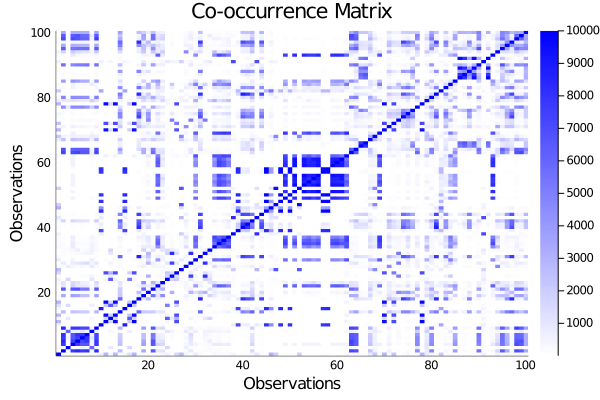

In [4]:
gibbs_sampler = Ntl.Samplers.GibbsSampler(10000)
dp_cluster_parameters = Ntl.Models.DpParameters(1)
dp_mixture = Ntl.Models.Mixture(dp_cluster_parameters, data_parameters)
markov_chain = Ntl.Fitter.fit(data, dp_mixture, gibbs_sampler)
Ntl.Plot.plot_co_occurrence_matrix(Matrix(markov_chain))